# 数据准备

In [22]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
np.random.seed(10)

In [23]:
from keras.datasets import mnist

In [24]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [25]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [26]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [27]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

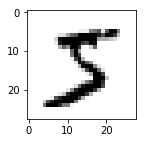

In [28]:
plot_image(x_train_image[0])

In [29]:
y_train_label[0]

5

In [30]:
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

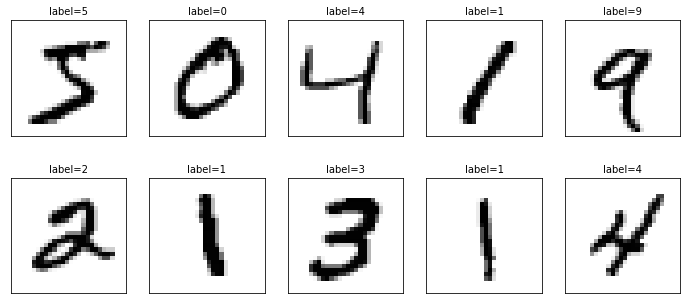

In [31]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [32]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


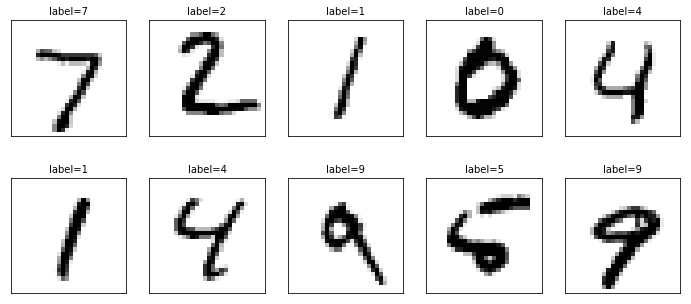

In [33]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 将images进行预处理

In [34]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [35]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [36]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [37]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [39]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# one hot encode outputs

In [40]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [41]:
y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)

In [42]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [57]:
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.4698 - acc: 0.8666 - val_loss: 0.2084 - val_acc: 0.9432
Epoch 2/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.2293 - acc: 0.9336 - val_loss: 0.1521 - val_acc: 0.9558
Epoch 3/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.1774 - acc: 0.9476 - val_loss: 0.1237 - val_acc: 0.9653
Epoch 4/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.1473 - acc: 0.9564 - val_loss: 0.1074 - val_acc: 0.9679
Epoch 5/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.1295 - acc: 0.9618 - val_loss: 0.0993 - val_acc: 0.9707
Epoch 6/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.1146 - acc: 0.9661 - val_loss: 0.0882 - val_acc: 0.9750
Epoch 7/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.1024 - acc: 0.9695 - val_loss: 0.0863 - val_acc

In [62]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

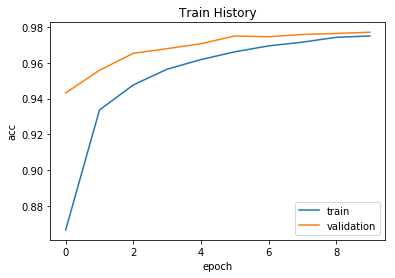

In [63]:
show_train_history(train_history, 'acc', 'val_acc')

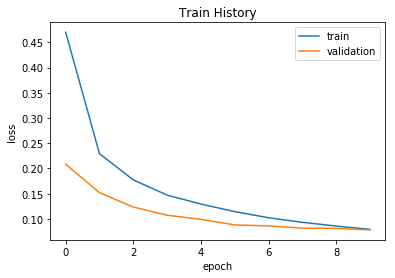

In [64]:
show_train_history(train_history, 'loss', 'val_loss')

In [65]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print(scores)

10000/10000 [==============================] - 0s 44us/step
[0.07220447814054787, 0.9785]


In [66]:
prediction = model.predict_classes(x_Test)

In [67]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [68]:
import pandas as pd

In [69]:
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,1,2,0,1,1,1,1,0
1,0,1124,4,0,0,0,3,0,4,0
2,2,0,1013,3,1,0,3,4,6,0
3,0,0,4,995,0,3,0,4,3,1
4,0,0,3,0,960,0,5,2,1,11
5,2,0,1,13,1,862,7,0,4,2
6,6,3,1,1,3,3,939,0,2,0
7,3,9,14,4,0,0,0,992,0,6
8,4,0,3,7,2,2,2,3,949,2
